In [1]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/enrique/')

In [2]:
import magellan as mg
import pandas as pd
mg.init_jvm()

DEBUG:Cloud:Log file (/Users/pradap/.picloud/cloud.log) opened


True

In [3]:
# read walmart dataset
wal =  mg.read_csv(mg.get_install_path() + '/datasets/books/walmart.csv', 
                    dtype={'isbn':pd.np.str, 'pages':pd.np.str, 'volume':pd.np.str, 'editionNum':pd.np.str},  
                    low_memory=False, key='id')

In [4]:
bwk = mg.read_csv(mg.get_install_path() + '/datasets/books/bowker.csv', 
                  dtype={'isbn':pd.np.str, 'pages':pd.np.str, 'volume':pd.np.str, 'editionNum':pd.np.str},  
                  low_memory=False, key='id')

In [5]:
ab = mg.AttrEquivalenceBlocker()
C = ab.block_tables(wal, bwk, 'isbn', 'isbn', ['title', 'author'], ['title', 'author'])

In [6]:
# S = mg.sample_table(C, 45)

In [7]:
# L = mg.label_table(C, 'gold')

In [8]:
L = mg.read_csv('label_ab_correct_books.csv', ltable=wal, rtable=bwk)

In [9]:
feat_table = mg.get_features_for_matching(wal, bwk)

In [10]:
f = feat_table.ix[[3,7,18,26, 53]]

In [11]:
G = mg.extract_feat_vecs(L, feat_table=f, attrs_after='gold')

In [12]:
dt = mg.DTMatcher()
svm = mg.SVMMatcher()
rf = mg.RFMatcher()
nb = mg.NBMatcher()
lg = mg.LogRegMatcher()

In [13]:
len(G)

68

In [14]:
# impute values
G.fillna(0, inplace=True)

In [45]:
G.head()

,_id,ltable.id,rtable.id,title_title_jac_qgm_3_qgm_3,author_author_jac_qgm_3_qgm_3,binding_binding_jac_qgm_3_qgm_3,publisher_publisher_jac_qgm_3_qgm_3,lang_lang_lev,gold
0,0,4086892,9780226156439,0.785714,1.000000,0,0.518519,1,1
1,1,535599,9780060655808,0.222222,1.000000,0,0.320000,1,1
2,2,12537042,9780030402432,0.243243,0.285714,0,0.025641,0,1
3,3,1386538,9780130901262,1.000000,0.785714,1,0.733333,1,1
4,4,13945932,9780205700424,0.375000,0.375000,0,0.733333,1,1


In [15]:
selected, stats = mg.select_matcher([dt, rf, svm, nb, lg], table=G, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'], 
                                    target_attr='gold', metric='precision')

In [16]:
selected

In [17]:
d = mg.train_test_split(G, train_proportion=0.7)
train = d['train']
test = d['test']


In [57]:
k = train.iloc[0]

In [55]:
train.dtypes['_id']

dtype('int64')

In [65]:
for c in k.index:
    k[c] = k[c].astype(train.dtypes[c])

/Users/pradap/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [113]:
t = train.iloc[[0]]

In [129]:
y = t.ix[t.index.values[0],'ltable.id']

In [130]:
y

4564015

In [18]:
dt.fit(table=train, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'], target_attr='gold')


In [19]:
mg.visualize_tree(dt, G.columns, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


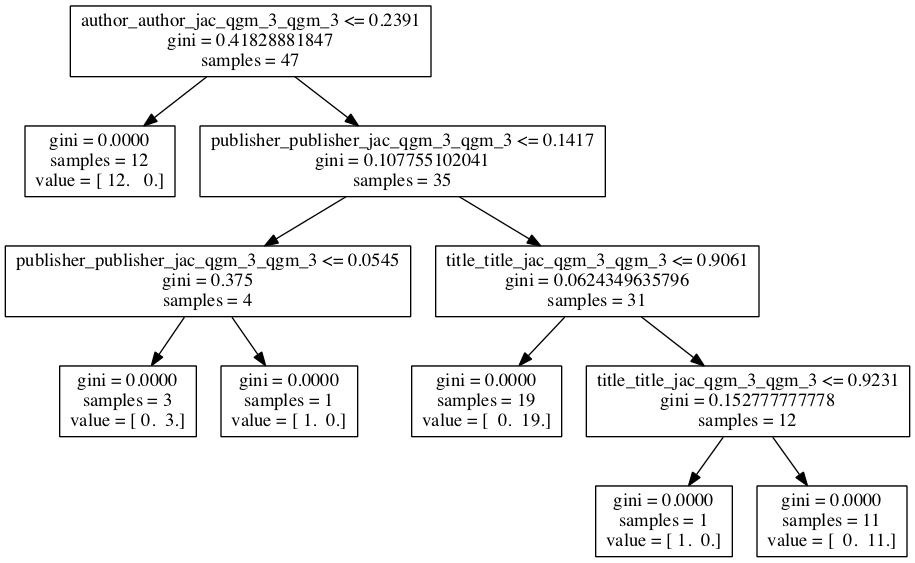

In [20]:
from IPython.display import Image
Image(filename='dt_.png') 

In [21]:
L

,_id,ltable.id,rtable.id,ltable.title,ltable.author,rtable.title,rtable.author,gold
0,0,4086892,9780226156439,The Bedtrick: Tales of Sex and Masquerade,"Doniger, Wendy",Bedtrick : Tales of Sex and Masquerade,"Doniger, Wendy",1
1,1,535599,9780060655808,HarperCollins Study Bible-NRSV,"Meeks, Wayne A.",Harpercollins Study Bible Standard Version wit...,"Meeks, Wayne A.",1
2,2,12537042,9780030402432,Se CD-R(set of 25)Allez Viens LV 2 2006,Damado,Allez Viens,d'Amado,1
3,3,1386538,9780130901262,Adaptive Filter Theory,"Haykin, Simon S.",Adaptive Filter Theory,"Haykin, Simon",1
4,4,13945932,9780205700424,An Introduction to Theories of Learning [With ...,"Olson, Matthew",Introduction to the Theories of Learning- (Val...,"Olson, Matthew H. Hergenhahn, B. R.",1
5,5,15280600,9780217455008,"Catalogue of Earthquakes on the Pacific Coast,...","McAdie, Alexander","Catalogue of Earthquakes on the Pacific Coast,...","Mcadie, Alexander",1
6,6,15286798,9780217825382,"Cured by an Incurable, by Crowquill and Pencil...","Pseud, Crowquill","Cured by an Incurable, by Crowquill and Pencil...","Pseud, Crowquill",1
7,7,15295588,9780217940207,The Daring Adventures of Kit Carson and Fremon...,"Frmont, John Charles",Daring Adventures of Kit Carson and Fremont,"Frmont, John Charles",0
8,8,15334872,9780217270052,"Personal Efficiency, Applied Salesmanship, and...","Allen, Irving Ross","Personal Efficiency, Applied Salesmanship, and...","Allen, Irving Ross",1
9,9,15338150,9780217304399,The Universal Merchant; In Theory and Practice...,"Alldridge, W. J.",Universal Merchant,"Alldridge, W. J.",1


In [22]:
w = wal.set_index('id', drop=False)
b = bwk.set_index('id', drop=False)

In [23]:
t1 = w.ix[7807428]
t2 = b.ix[9780077217181]

In [24]:
t1

id                                                        7807428
title                   The Art of Public Speaking [With Booklet]
author                                          Lucas, Stephen E.
numAuthors                                                      1
binding                                                 Paperback
publisher                                     McGraw-Hill College
isbn                                                9780077217181
pubYear                                                      2007
pubMonth                                                        7
pubDay                                                          1
editionNum                                                   9 PA
pages                                                         NaN
volume                                                        NaN
lang                                                          ENG
editionDescr                                                  NaN
category  

In [25]:
t1 = t1.fillna(0)
t2 = t2.fillna(0)

In [26]:
g = G.ix[0]

In [27]:
g.index.values

array(['_id', 'ltable.id', 'rtable.id', 'title_title_jac_qgm_3_qgm_3',
       'author_author_jac_qgm_3_qgm_3', 'binding_binding_jac_qgm_3_qgm_3',
       'publisher_publisher_jac_qgm_3_qgm_3', 'lang_lang_lev', 'gold'], dtype=object)

In [28]:
g[['title_title_jac_qgm_3_qgm_3',
       'author_author_jac_qgm_3_qgm_3', 'binding_binding_jac_qgm_3_qgm_3',
       'publisher_publisher_jac_qgm_3_qgm_3', 'lang_lang_lev']].to_dict()

{'author_author_jac_qgm_3_qgm_3': 1.0,
 'binding_binding_jac_qgm_3_qgm_3': 0.0,
 'lang_lang_lev': 1.0,
 'publisher_publisher_jac_qgm_3_qgm_3': 0.51851851851851849,
 'title_title_jac_qgm_3_qgm_3': 0.7857142857142857}

In [29]:
G.ix[0]

_id                                    0.000000e+00
ltable.id                              4.086892e+06
rtable.id                              9.780226e+12
title_title_jac_qgm_3_qgm_3            7.857143e-01
author_author_jac_qgm_3_qgm_3          1.000000e+00
binding_binding_jac_qgm_3_qgm_3        0.000000e+00
publisher_publisher_jac_qgm_3_qgm_3    5.185185e-01
lang_lang_lev                          1.000000e+00
gold                                   1.000000e+00
Name: 0, dtype: float64

In [31]:
xx = [False, False, False, True, True, True, False]

In [40]:
fv_columns = g.index

In [36]:
exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold']
cols = [c not in exclude_attrs for c in fv_columns]

In [41]:
fv_columns[cols]

Index([u'title_title_jac_qgm_3_qgm_3', u'author_author_jac_qgm_3_qgm_3',
       u'binding_binding_jac_qgm_3_qgm_3',
       u'publisher_publisher_jac_qgm_3_qgm_3', u'lang_lang_lev'],
      dtype='object')

In [34]:
g[g.index[xx]]

title_title_jac_qgm_3_qgm_3        0.785714
author_author_jac_qgm_3_qgm_3      1.000000
binding_binding_jac_qgm_3_qgm_3    0.000000
Name: 0, dtype: float64

In [30]:
mg.debug_decisiontree_matcher_vis(dt, G.ix[0], exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

['_id' '_id' '_id' 'ltable.id' 'ltable.id' 'ltable.id' 'ltable.id'
 'ltable.id' '_id']
OrderedDict([('_id', _id    0
_id    0
_id    0
_id    0
Name: 0, dtype: float64), ('ltable.id', ltable.id    4086892
ltable.id    4086892
ltable.id    4086892
ltable.id    4086892
ltable.id    4086892
Name: 0, dtype: float64)])
def debug_fn(): 
    node_list = []
    if ( _id <= 0.239130437374 ):
        node_list.extend([True, '_id <= 0.239130437374', _id])
        return False, node_list #( 12 examples )
    else:
        node_list.extend([False, '_id <= 0.239130437374', _id])
        if ( ltable.id <= 0.141666665673 ):
            node_list.extend([True, 'ltable.id <= 0.141666665673', ltable.id])
            if ( ltable.id <= 0.0544871799648 ):
                node_list.extend([True, 'ltable.id <= 0.0544871799648', ltable.id])
                return True, node_list #( 3 examples )
            else:
                node_list.extend([False, 'ltable.id <= 0.0544871799648', ltable.id])
              

/Users/pradap/Documents/Research/Python-Package/enrique/magellan/debugmatcher/debug_decisiontree_matcher.py:234: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  feature_names = fv_columns[cols]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().